In [52]:
import sys
import os
import json
import numpy as np
import matplotlib.pyplot as plt
from keras.models import model_from_yaml
import pyBigWig

In [15]:
sys.path.insert(0,'/srv/scratch/manyu/NIPS_workshop_tests/motif_analysis/')

In [38]:
%load_ext autoreload
%autoreload 2

import pwm_utils
from pwm_utils import run_pipeline_with_all_pos_intervals
from pwm_utils import plot_and_save_information_content_pwms

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
path_to_modelspec = '/srv/scratch/manyu/NIPS_workshop_tests/train_models/DapSeq/seq_meth_AC_models/logdir_3wREM16/modelspec.json'
path_to_datasetspec = '/srv/scratch/manyu/NIPS_workshop_tests/train_models/DapSeq/seq_meth_AC_models/logdir_3wREM16/datasetspec.json'
path_to_model_arch = '/srv/scratch/manyu/NIPS_workshop_tests/train_models/DapSeq/seq_meth_AC_models/logdir_3wREM16/model.arch.yaml'
path_to_model_weights = '/srv/scratch/manyu/NIPS_workshop_tests/train_models/DapSeq/seq_meth_AC_models/logdir_3wREM16/model.weights.h5'

In [40]:
path_to_intervals = '/srv/scratch/manyu/NIPS_workshop_tests/train_models/DapSeq/label_regions/labeled_intervals/REM16_DapSeq_bin200_flank400_stride200.TAIR10.intervals.bed'
path_to_labels = '/srv/scratch/manyu/NIPS_workshop_tests/train_models/DapSeq/label_regions/labeled_intervals/REM16_DapSeq_bin200_flank400_stride200.TAIR10.labels.npy'


In [56]:
#'chrIII-NC_003074'
test_chroms = ['chrIV-NC_003075','chrIII-NC_003074']

savedir = './REM16/REM16_seq_meth_AC_3w'
base_memmap_path = '/srv/scratch/manyu/NIPS_workshop_tests/train_models/DapSeq/'

In [59]:
!rm -r ./REM16/REM16_seq_meth_AC_3w/

In [60]:
import os
os.makedirs(savedir)

In [61]:
os.path.exists(path_to_datasetspec)


True

In [62]:
path_to_A_meth_9d = '/srv/scratch/manyu/Methylation_data/Arabidopsis_6mA_methylation/GSM2157793_Col_6mA_modification.normalized.renamed.bigWig'
path_to_A_meth_21d = '/srv/scratch/manyu/Methylation_data/Arabidopsis_6mA_methylation/GSM2859319_Col_3w_6mA_modification.normalized.renamed.bigWig'


In [53]:
bw_A_21d = pyBigWig.open(path_to_A_meth_21d)

In [55]:
bw_A_21d.chroms()

{'chloroplast': 154478L,
 'chrI-NC_003070': 30427671L,
 'chrII-NC_003071': 19698289L,
 'chrIII-NC_003074': 23459830L,
 'chrIV-NC_003075': 18585056L,
 'chrM': 366924L,
 'chrV-NC_003076': 26975502L}

In [63]:
run_pipeline_with_all_pos_intervals(path_to_modelspec,
                                    path_to_model_arch,path_to_model_weights,
                                    path_to_intervals,path_to_labels,
                                    test_chroms,path_to_datasetspec,
                                    savedir=savedir,path_to_pos_intervals=None,
                                    path_to_memmapped_data = base_memmap_path,path_to_methylation_bigwig=path_to_A_meth_21d,
                                    meth_threshold = 4.0)

Loading model 

Wrote to ./tmp_intervals/pos_intervals.bed
Total sequences is 18
Creating positive intervals set

Creating intervals list 

Reshaping Intervals and filters to use tf.nn.conv2D
All shapes are compatible:
Proceeding with convolutions:
Doing filter 0
Doing filter 1
Doing filter 2
Doing filter 3
Doing filter 4
Doing filter 5
Doing filter 6
Doing filter 7
Doing filter 8
Doing filter 9
Doing filter 10
Doing filter 11
Doing filter 12
Doing filter 13
Doing filter 14
Doing filter 15
Doing filter 16
Doing filter 17
Doing filter 18
Doing filter 19
Doing filter 20
Doing filter 21
Doing filter 22
Doing filter 23
Doing filter 24
Doing filter 25
Doing filter 26
Doing filter 27
Doing filter 28
Doing filter 29
Doing filter 30
Doing filter 31
Doing filter 32
Doing filter 33
Doing filter 34
Doing filter 35
Doing filter 36
Doing filter 37
Doing filter 38
Doing filter 39
Doing filter 40
Doing filter 41
Doing filter 42
Doing filter 43
Doing filter 44
Doing filter 45
Doing filter 46
Doing fil

Saved all images to ./REM16/REM16_seq_meth_AC_3w/


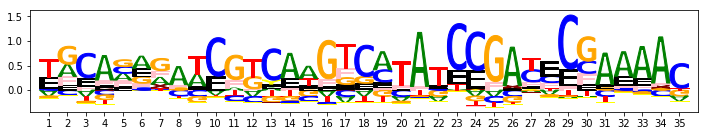

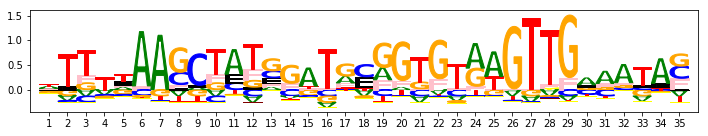

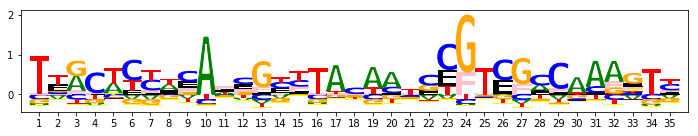

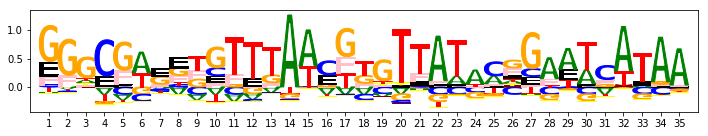

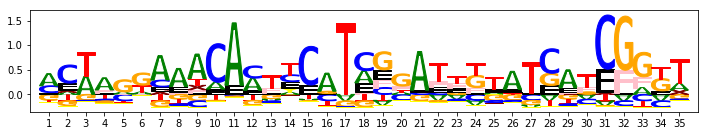

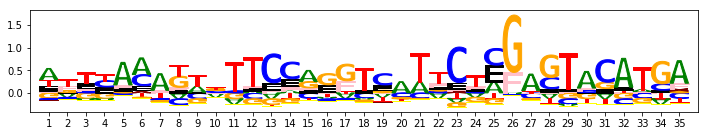

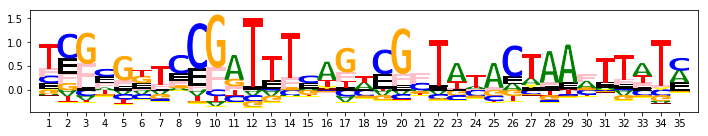

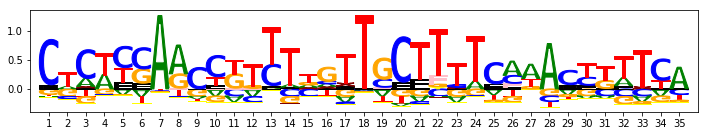

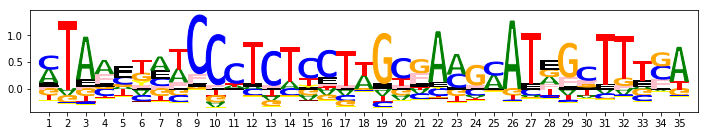

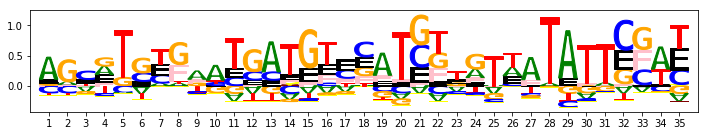

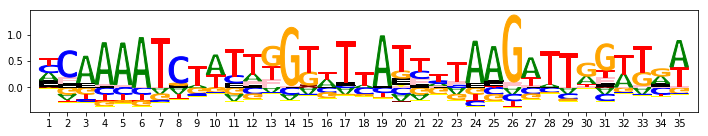

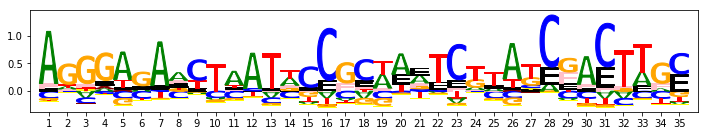

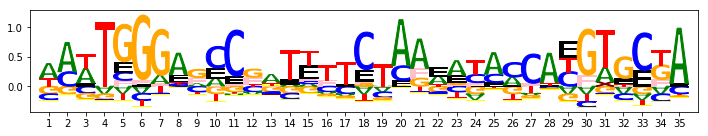

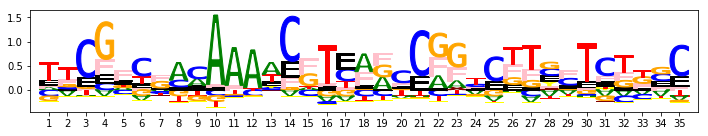

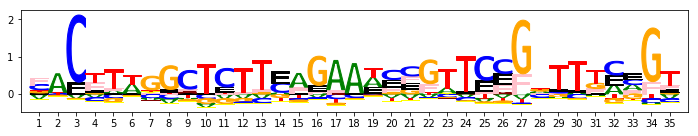

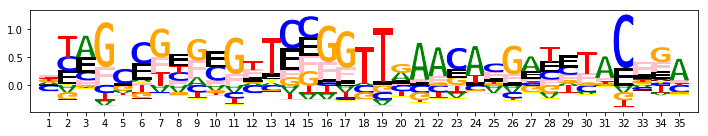

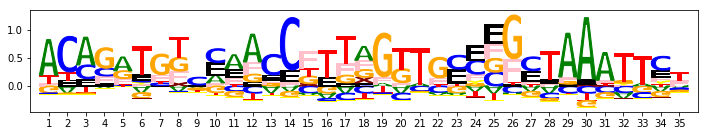

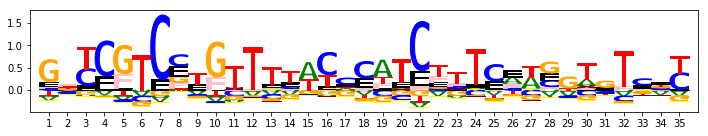

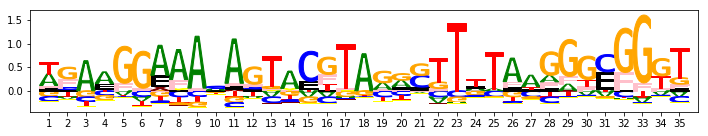

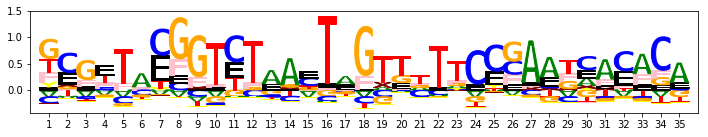

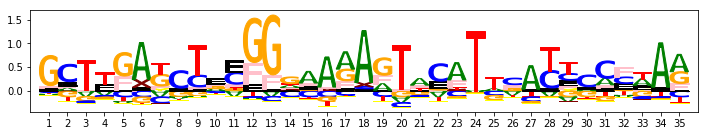

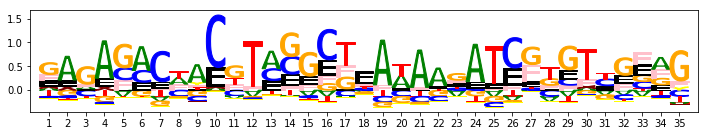

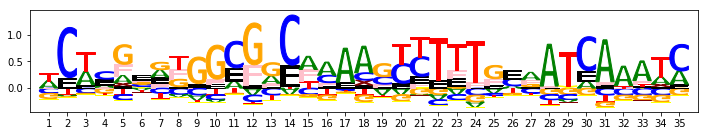

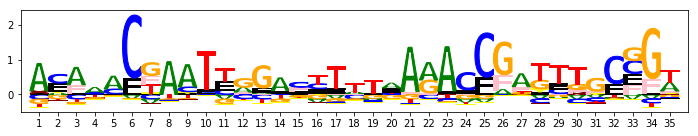

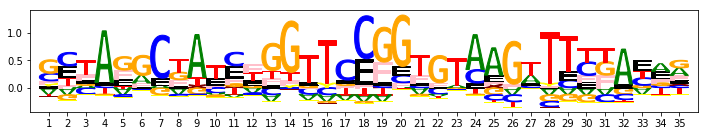

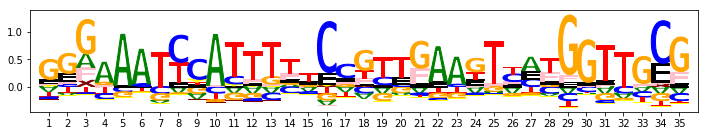

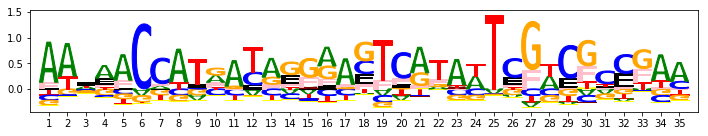

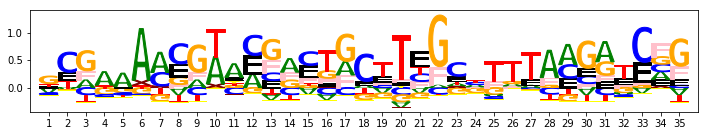

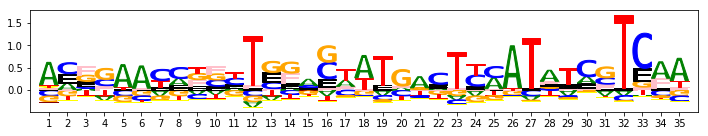

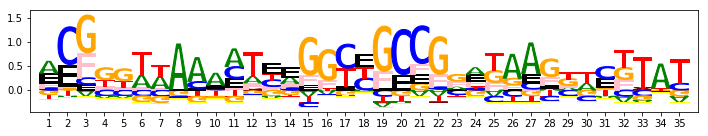

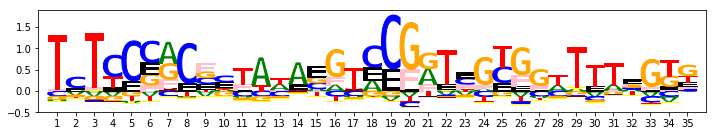

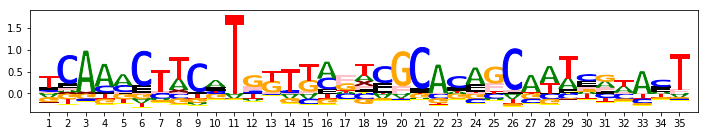

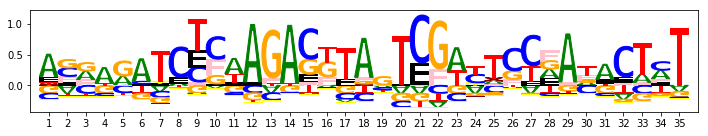

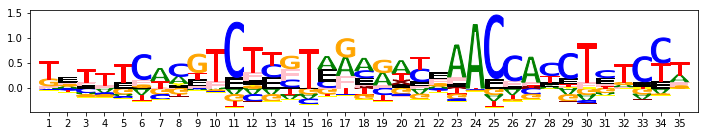

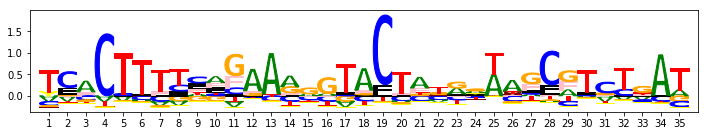

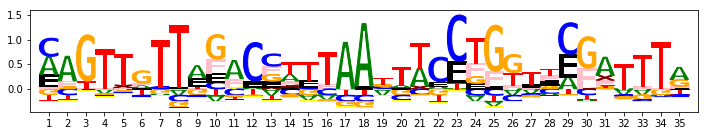

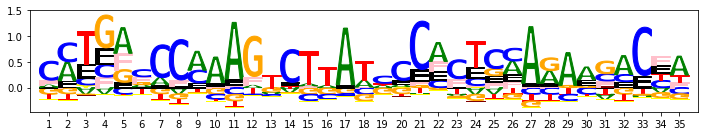

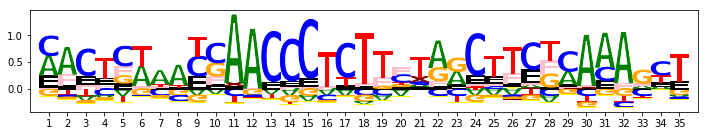

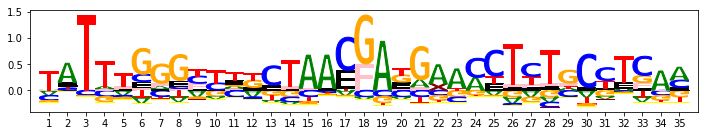

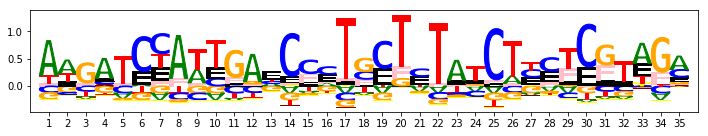

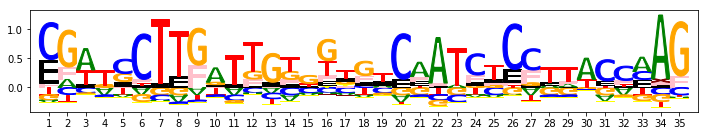

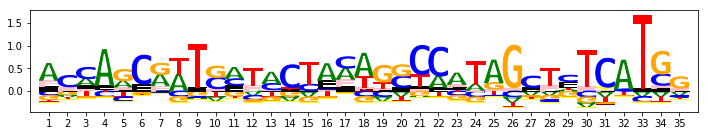

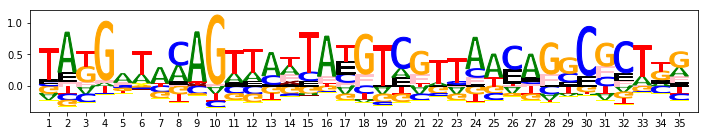

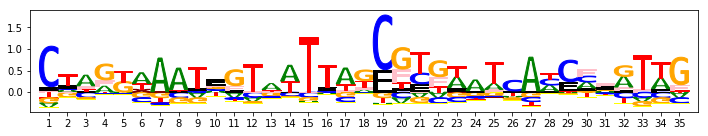

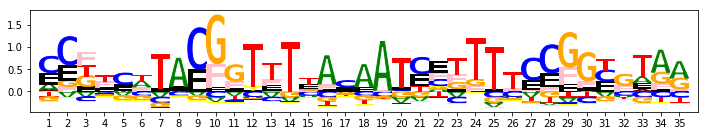

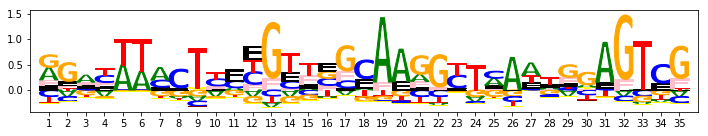

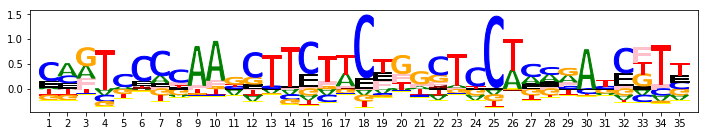

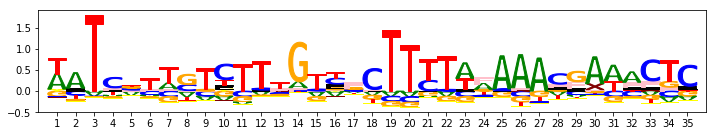

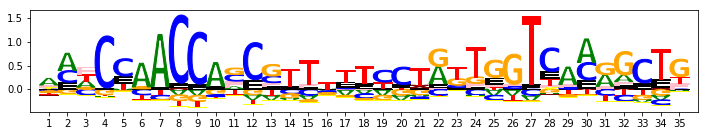

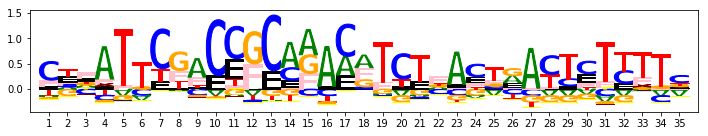

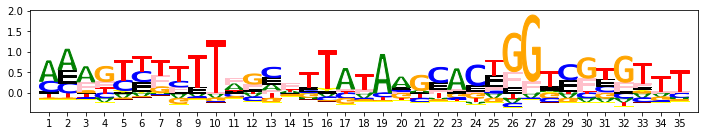

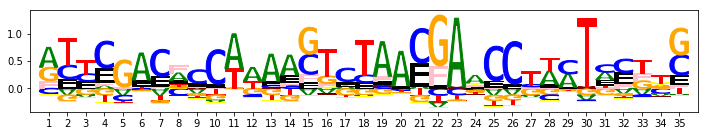

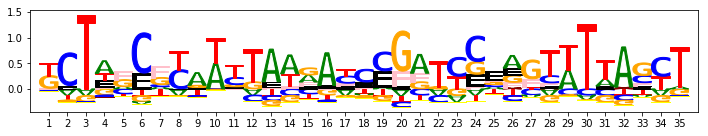

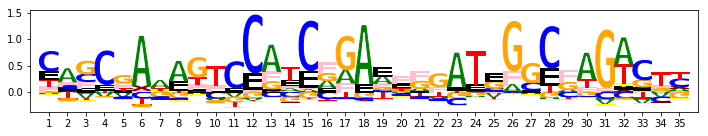

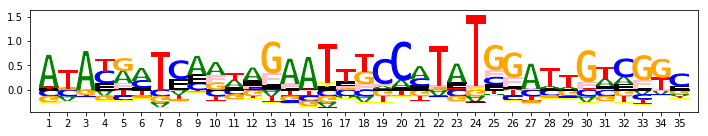

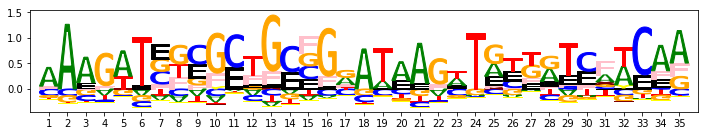

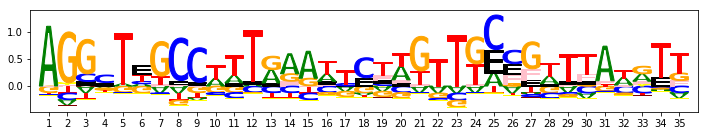

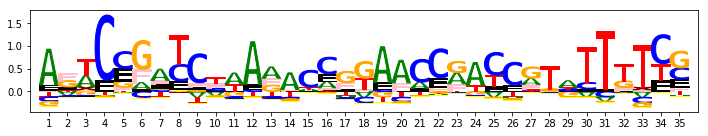

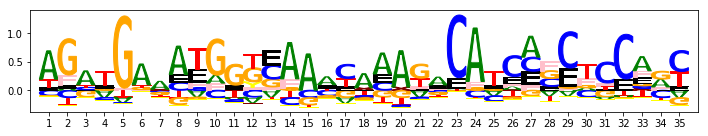

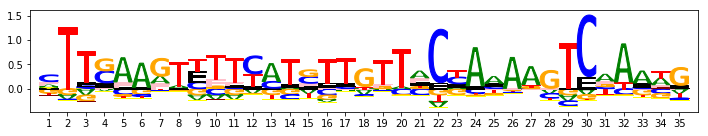

In [64]:
plot_and_save_information_content_pwms('./REM16/REM16_seq_meth_AC_3w/',vocab = 'Meth_8_channel')

In [205]:
##Learning max value of T,A methylation in these motifs
##

max_t = 0.0
max_a = 0.0
for i in range(60):
    info_matrix_path = '/srv/scratch/manyu/NIPS_workshop_tests/motif_analysis/DapSeq_motifs/DEL2/DEL2_seq_meth_AC_3w/info_matrix{}.npy'.format(i)
    mat =np.load(info_matrix_path)
    t_meth = max(mat[-1,:])
    a_meth = max(mat[0,:])
    if t_meth>max_t:
        max_t = t_meth
    if a_meth>max_a:
        max_a = a_meth
        
    

In [30]:
from pwm_utils import pfm_counts_pipeline_seq_AC_meth_models,pfm_counts_pipeline_seq_A_meth_models

In [40]:
import pyBigWig
from pybedtools import BedTool
import pandas as pd


In [77]:
path_to_A_meth_9d = '/srv/scratch/manyu/Methylation_data/Arabidopsis_6mA_methylation/GSM2157793_Col_6mA_modification.normalized.renamed.bigWig'
path_to_A_meth_21d = '/srv/scratch/manyu/Methylation_data/Arabidopsis_6mA_methylation/GSM2859319_Col_3w_6mA_modification.normalized.renamed.bigWig'


In [74]:
def filter_positive_test_intervals(path_to_intervals_file,path_to_labels,test_chroms_list,path_to_positive_intervals):
    intervals_dataframe = pd.read_csv(path_to_intervals_file,sep = '\t',names=['chr','start','end','labels'])
    labels = np.load(path_to_labels)
    intervals_dataframe['labels'] = labels
    filtered_pos_dataframe = intervals_dataframe.loc[intervals_dataframe['chr'].isin(test_chroms_list) & intervals_dataframe['labels']==1]
    return filtered_pos_dataframe
#     filtered_pos_dataframe.to_csv(path_to_positive_intervals,sep='\t',header=False,index=False)
#     return
#     print("Wrote to {}".format(path_to_positive_intervals))

In [121]:
if not os.path.exists('./tmp'):
    os.makedirs('./tmp/')
path_to_pos_intervals = './tmp/pos_intervals.bed'

In [159]:
pos_intervals = filter_positive_test_intervals(path_to_intervals,path_to_labels,test_chroms,path_to_pos_intervals)

In [160]:
print(len(pos_intervals))

131


In [158]:
A_meth_9d_bw = pyBigWig.open(path_to_A_meth_9d)
A_meth_21d_bw=  pyBigWig.open(path_to_A_meth_21d)


In [157]:
def nan_to_zero(arr):
    for i in range(len(arr)):
        if np.isnan(arr[i]):
            arr[i]=0
    return arr        

In [192]:
meth_list = []
for index,row in pos_intervals.iterrows():
    chrom = row['chr']
    start = row['start']
    end  = row['end']
    
    try:
        methcounts = np.sum(nan_to_zero(A_meth_21d_bw.values(chrom,start,end,numpy=True)))
        meth_list.append(methcounts)
    except:
        pass
"""
Include the methylation level of the interval as a new column in the data frame
"""
pos_intervals['methylation'] = pd.Series(meth_list,index = pos_intervals.index)    
pos_intervals.sort_values(by=['methylation'],ascending=False,inplace=True)

In [209]:
count=0
for index,row in pos_intervals.iterrows():
    if row['methylation']>3.0:
        count+=1
    else:
        break
print(count)        

19


In [210]:
#pos_intervals.head(n=count)
pos_intervals.head(n=count).to_csv(path_to_pos_intervals,sep='\t',header=False,index=False)

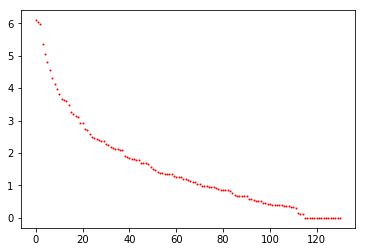

In [211]:
meth_list = sorted(meth_list,key=lambda x: -1*x)
import matplotlib.pyplot as plt
plt.plot(meth_list,'ro',markersize=1)
plt.show()

In [212]:
pos_intervals_bedtool = BedTool('./tmp/pos_intervals.bed')
num_intervals = len(pos_intervals_bedtool)

In [213]:
num_intervals

19

In [214]:
with open(path_to_datasetspec,'r') as f:
    datasetspec = json.load(f)

[(celltype, data_sources)] = datasetspec.items()
with open(path_to_modelspec,'r') as f:
    model_name = json.load(f)['model_class']

path_to_memmapped_data = base_memmap_path
path_to_genome_bcolz = path_to_memmapped_data+data_sources['genome_data_dir']
path_to_C_methylation_bcolz = path_to_memmapped_data+data_sources['methylation_data_dir']
path_to_A_methylation_bcolz = path_to_memmapped_data+data_sources['A_methylation_data_dir']

In [215]:
os.path.exists(path_to_C_methylation_bcolz)

True

In [216]:
data_sources['genome_data_dir']

u'memmaped_bcolz_datasets/TAIR10.fa/'

In [217]:
with open(path_to_model_arch,'r') as f:
    model = model_from_yaml(f)
    model.load_weights(path_to_model_weights)

In [218]:
!rm -r ./REM16/REM16_seq_meth_AC_3w


In [219]:
if not os.path.exists(savedir):
    os.makedirs(savedir)

In [220]:
!ls ./REM16/REM16_seq_meth_AC_3w

In [221]:
a,b =pfm_counts_pipeline_seq_AC_meth_models(pos_intervals_bedtool,path_to_genome_bcolz,path_to_C_methylation_bcolz,path_to_A_methylation_bcolz,model,num_intervals = num_intervals,savedir = savedir)

Creating intervals list 

Reshaping Intervals and filters to use tf.nn.conv2D
All shapes are compatible:
Proceeding with convolutions:
Doing filter 0
Doing filter 1
Doing filter 2
Doing filter 3
Doing filter 4
Doing filter 5
Doing filter 6
Doing filter 7
Doing filter 8
Doing filter 9
Doing filter 10
Doing filter 11
Doing filter 12
Doing filter 13
Doing filter 14
Doing filter 15
Doing filter 16
Doing filter 17
Doing filter 18
Doing filter 19
Doing filter 20
Doing filter 21
Doing filter 22
Doing filter 23
Doing filter 24
Doing filter 25
Doing filter 26
Doing filter 27
Doing filter 28
Doing filter 29
Doing filter 30
Doing filter 31
Doing filter 32
Doing filter 33
Doing filter 34
Doing filter 35
Doing filter 36
Doing filter 37
Doing filter 38
Doing filter 39
Doing filter 40
Doing filter 41
Doing filter 42
Doing filter 43
Doing filter 44
Doing filter 45
Doing filter 46
Doing filter 47
Doing filter 48
Doing filter 49
Doing filter 50
Doing filter 51
Doing filter 52
Doing filter 53
Doing filte

Saved all images to ./REM16/REM16_seq_meth_AC_3w/


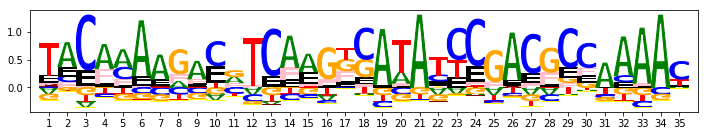

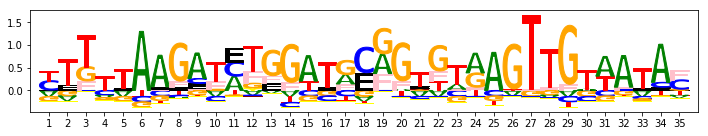

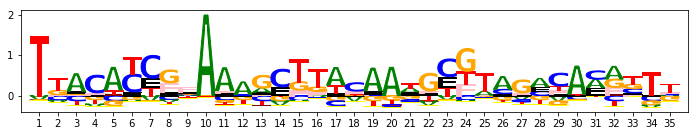

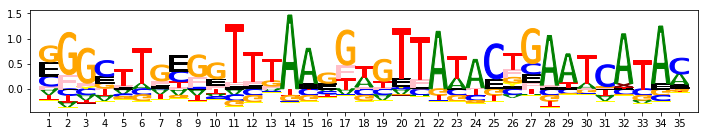

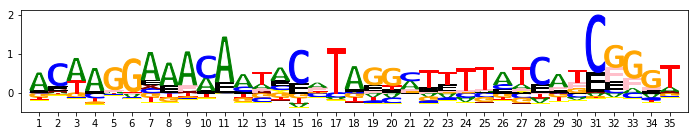

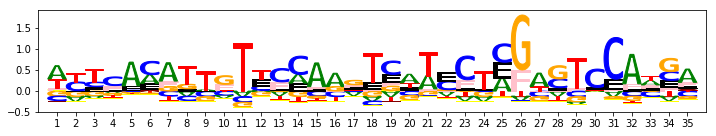

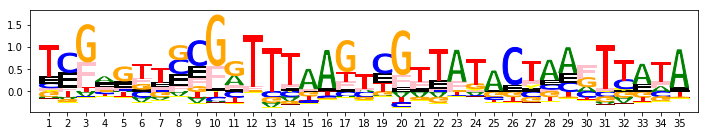

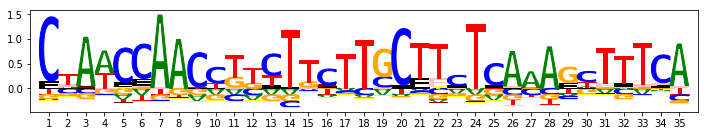

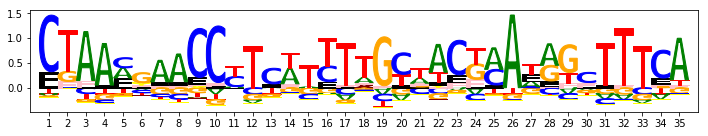

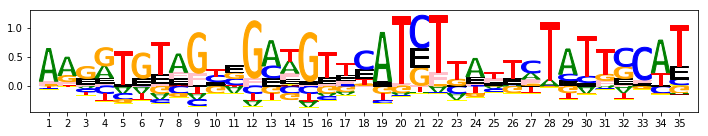

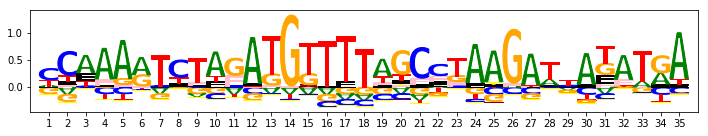

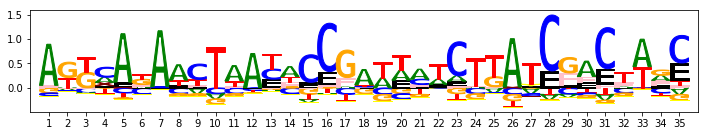

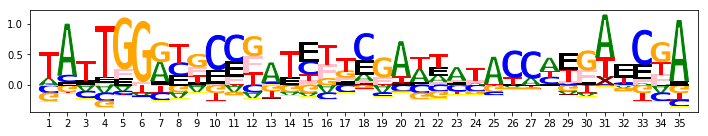

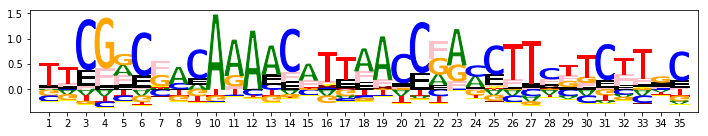

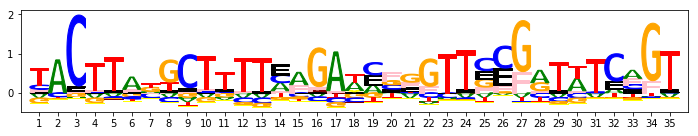

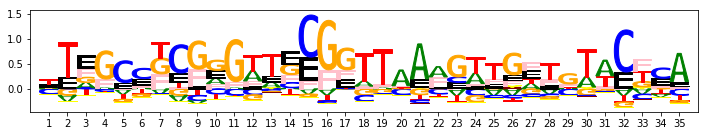

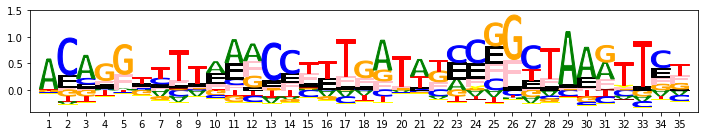

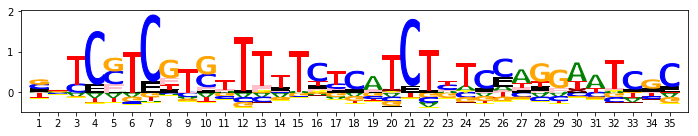

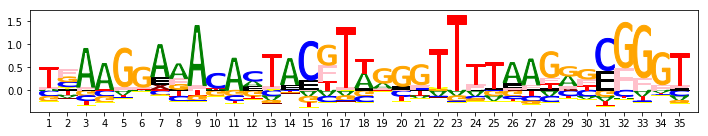

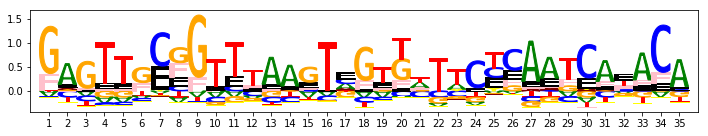

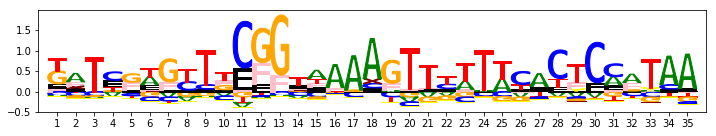

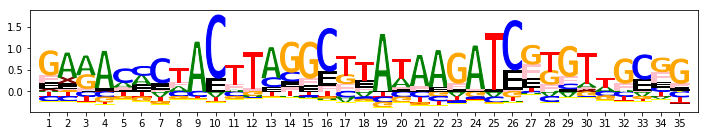

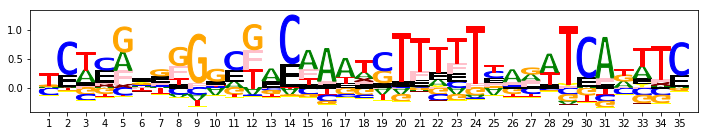

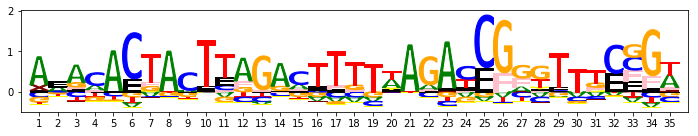

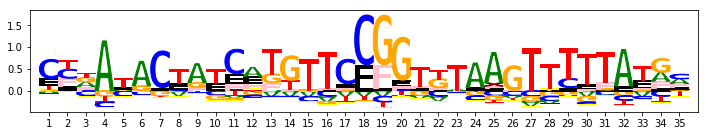

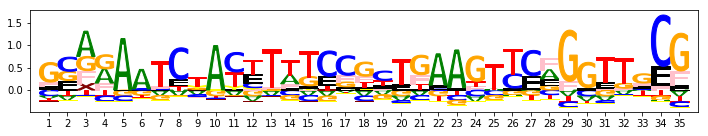

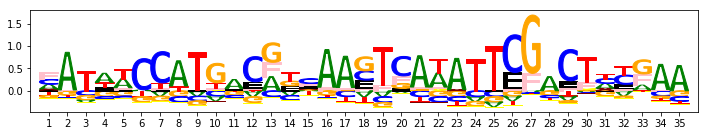

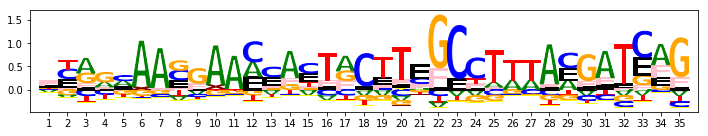

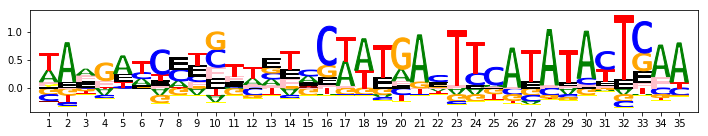

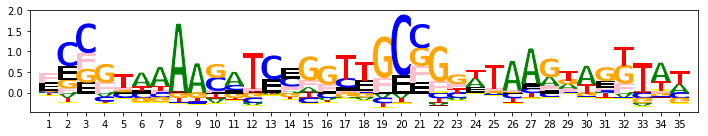

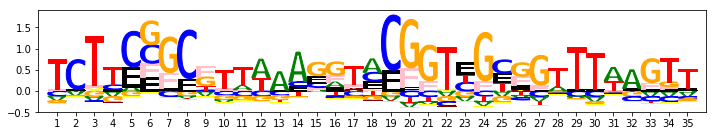

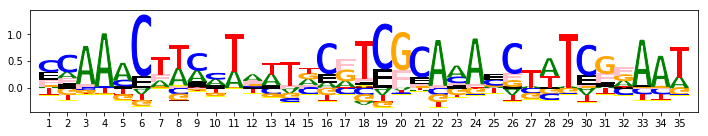

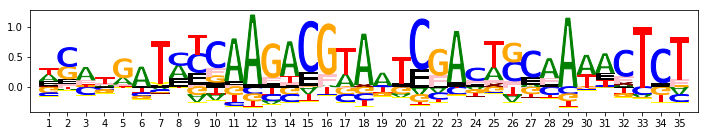

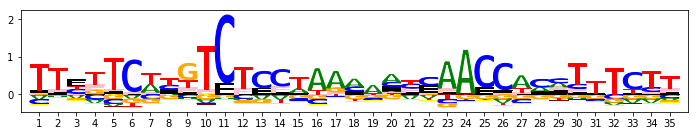

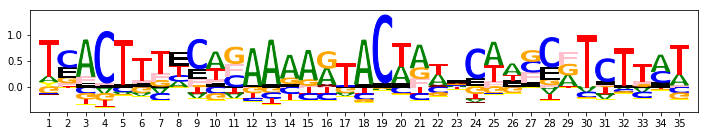

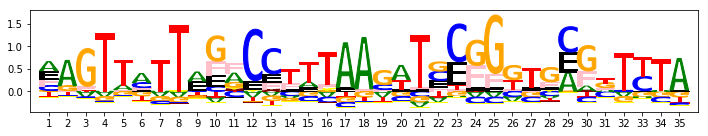

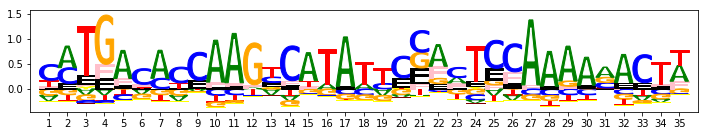

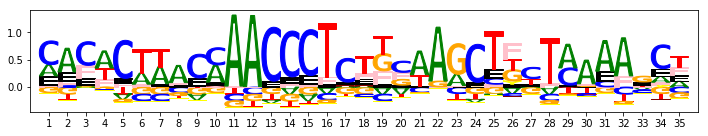

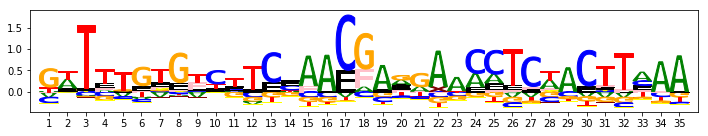

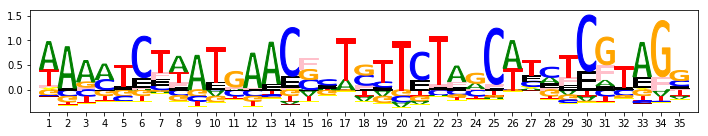

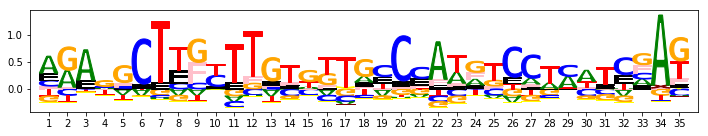

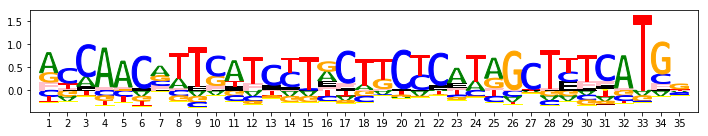

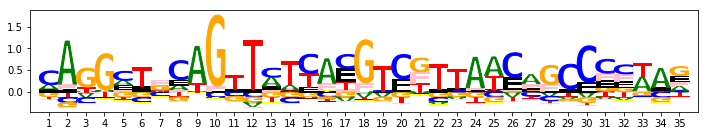

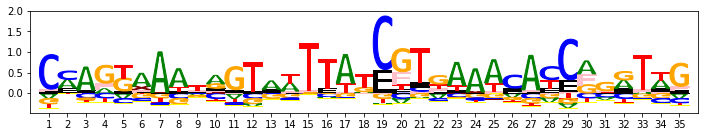

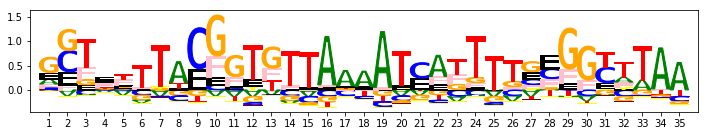

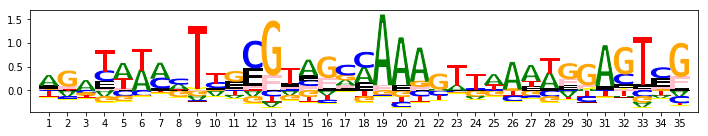

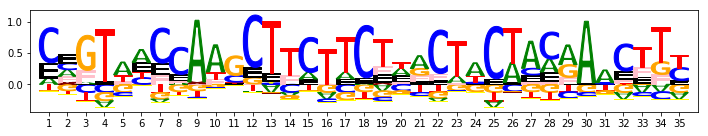

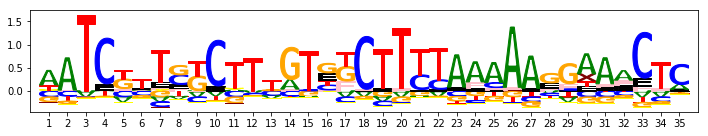

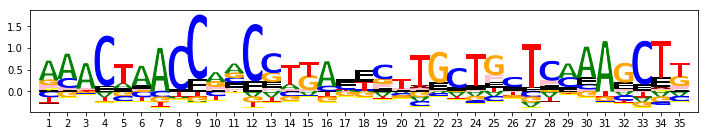

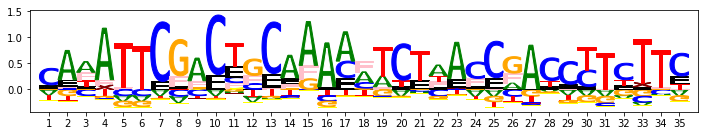

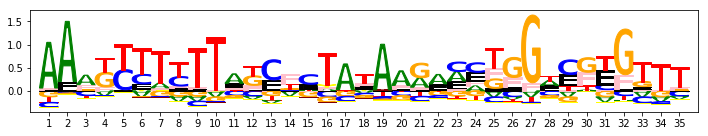

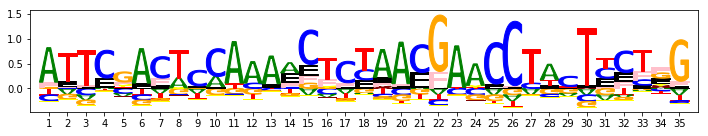

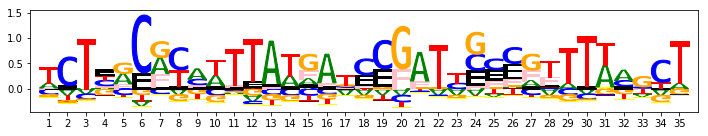

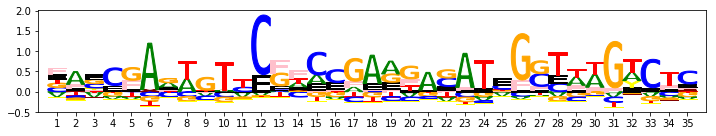

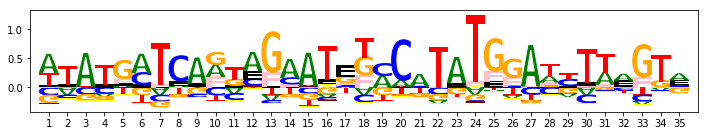

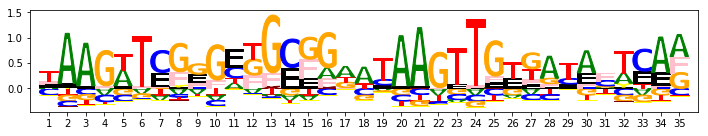

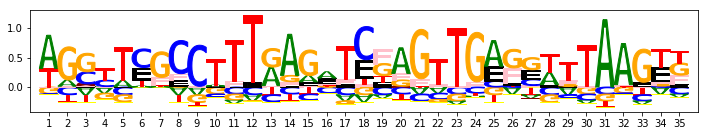

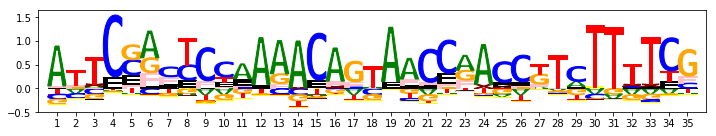

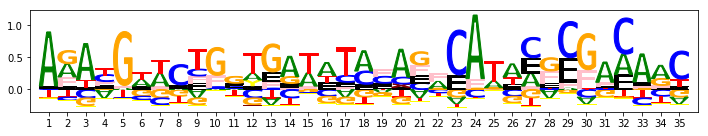

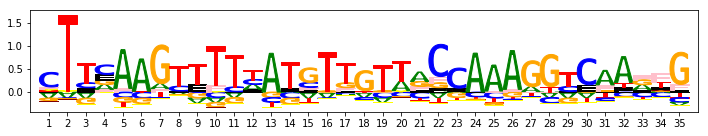

In [222]:
plot_and_save_information_content_pwms('./REM16/REM16_seq_meth_AC_3w/',vocab = 'Meth_8_channel')